In [1]:
import pandas as pd # load and manipulate data and for One-Hot Encoding
import numpy as np # calculate the mean and standard deviation
import matplotlib.pyplot as plt # drawing graphs
from sklearn.tree import DecisionTreeClassifier # a classification tree
from sklearn.tree import plot_tree # draw a classification tree
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.model_selection import cross_val_score # cross validation
from sklearn.metrics import confusion_matrix # creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix

In [2]:
df = pd.read_csv('processed.cleveland.data',header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df.columns = ['age', 
              'sex', 
              'cp', 
              'restbp', 
              'chol', 
              'fbs', 
              'restecg', 
              'thalach', 
              'exang', 
              'oldpeak', 
              'slope', 
              'ca', 
              'thal', 
              'hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
len(df.loc[(df['ca'] == '?') | (df['thal'] == '?')])

6

In [6]:
df.loc[(df['ca'] == '?') | (df['thal'] == '?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [7]:
df_no_missing =df.loc[(df['ca'] != '?') & (df['thal'] != '?')]

In [8]:
X = df_no_missing[['age', 
              'sex', 
              'cp', 
              'restbp', 
              'chol', 
              'fbs', 
              'restecg', 
              'thalach', 
              'exang', 
              'oldpeak', 
              'slope', 
              'ca', 
              'thal']]
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [9]:
Y = df_no_missing['hd']
Y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

In [10]:

pd.get_dummies(X,columns=['cp'])

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,0,0,0,1
298,45.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,0,0,0
299,68.0,1.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,0,0,0,1
300,57.0,1.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,0,0,0,1


In [11]:
X_encoded = pd.get_dummies(X,columns=['cp','restecg','slope','thal'])
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [12]:
X = X_encoded 
y_not_zero_index = Y > 0
Y[y_not_zero_index] = 1
Y.unique()

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


array([0, 1], dtype=int64)

In [13]:
#BUILD PRELIMINARY TREE
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

In [14]:
from sklearn.metrics import accuracy_score
RF_training_labels = clf_dt.predict(X_train)  
print(accuracy_score(y_train, RF_training_labels))
RF_test_labels = clf_dt.predict(X_test)
print(accuracy_score(y_test, RF_test_labels))


1.0
0.76


In [15]:
from sklearn import tree
print(clf_dt.tree_.max_depth)

11


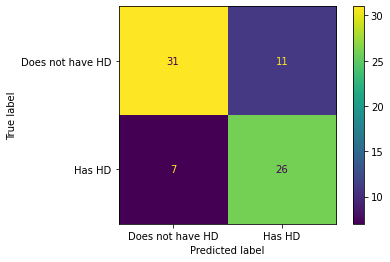

In [16]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Does not have HD", "Has HD"])

In [18]:
#Cost Complexity Pruning
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = ccp_alphas[:-1]

clf_dts = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

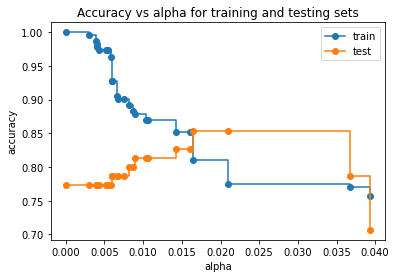

In [19]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [20]:
scores = pd.DataFrame({"train":train_scores,"test":test_scores,"alpha":ccp_alphas})
scores

,train,test,alpha
0,1.000000,0.773333,0.000000
1,0.995495,0.773333,0.002953
2,0.986486,0.773333,0.003861
3,0.981982,0.773333,0.004054
4,0.977477,0.773333,0.004095
5,0.972973,0.773333,0.004294
6,0.972973,0.773333,0.005148
7,0.972973,0.773333,0.005413
8,0.963964,0.773333,0.005788
9,0.927928,0.786667,0.006006


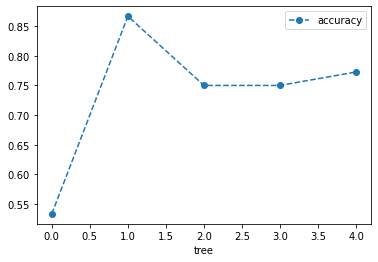

In [21]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)
scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

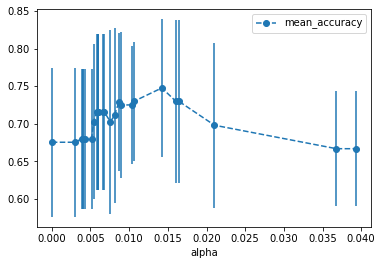

In [22]:
alpha_loop_values = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_loop_values, 
                             columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha', 
                   y='mean_accuracy', 
                   yerr='std', 
                   marker='o', 
                   linestyle='--')

In [23]:
alpha_results[(alpha_results['alpha']>0.014)
               &
              (alpha_results['alpha']<0.015)]

,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


In [24]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha']>0.014)
               &
              (alpha_results['alpha']<0.015)]['alpha']
ideal_ccp_alpha

20    0.014225
Name: alpha, dtype: float64

In [25]:
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.014224751066856332

In [26]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42, 
                                       ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train) 

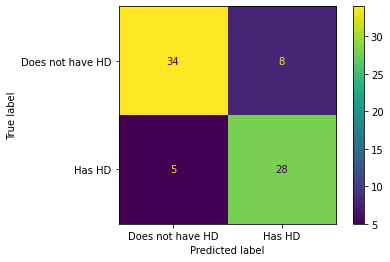

In [27]:
plot_confusion_matrix(clf_dt_pruned, 
                      X_test, 
                      y_test, 
                      display_labels=["Does not have HD", "Has HD"])

In [28]:
from sklearn.metrics import accuracy_score
RF_training_labels = clf_dt_pruned.predict(X_train)  
print(accuracy_score(y_train, RF_training_labels))
RF_test_labels = clf_dt_pruned.predict(X_test)
print(accuracy_score(y_test, RF_test_labels))

0.8513513513513513
0.8266666666666667


(       train      test
 1   0.243446  0.166667
 2   0.224719  0.300000
 3   0.146067  0.133333
 4   0.127341  0.233333
 5   0.071161  0.233333
 6   0.033708  0.200000
 7   0.014981  0.200000
 8   0.007491  0.200000
 9   0.000000  0.200000
 10  0.000000  0.233333
 11  0.000000  0.233333
 12  0.000000  0.200000
 13  0.000000  0.200000
 14  0.000000  0.200000,
 <matplotlib.axes._subplots.AxesSubplot at 0x11c789c7e48>)

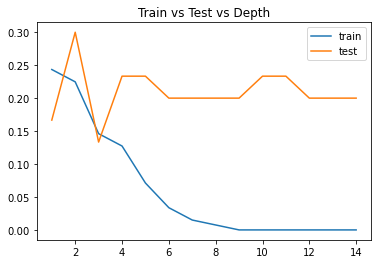

In [30]:
#TRAIN TEST SPLIT...Getting the max_depth at which the test error is minimum
j=1
train = []
test = []
while j<15:
    X1_train, X1_test, y1_train, y1_test = train_test_split(X,Y,random_state=42,test_size=0.1)
    model = DecisionTreeClassifier(max_depth=j)
    model.fit(X1_train,y1_train)
    RF_training_labels = model.predict(X1_train)
    RF_test_labels = model.predict(X1_test)
    train.append(accuracy_score(y1_train, RF_training_labels))
    test.append(accuracy_score(y1_test, RF_test_labels))
    j=j+1
    
accuracy_frame = pd.DataFrame({ "train" :train, "test":test })
accuracy_frame["train"] = 1-accuracy_frame["train"]
accuracy_frame["test"] = 1-accuracy_frame["test"]
accuracy_frame.index = np.arange(1, len(accuracy_frame)+1)
(accuracy_frame,accuracy_frame.plot.line(title= "Train vs Test vs Depth"))


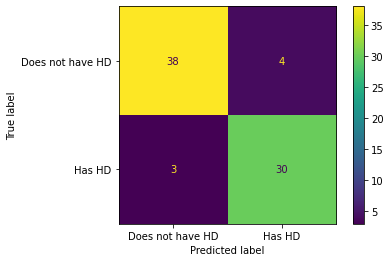

In [29]:
#pruning by max_depth
X1_train, X1_test, y1_train, y1_test = train_test_split(X,Y,random_state=42,test_size=0.1)
model = DecisionTreeClassifier(max_depth=3)
model.fit(X1_train,y1_train)
RF_training_labels = model.predict(X1_train)
RF_test_labels = model.predict(X1_test)
train.append(accuracy_score(y1_train, RF_training_labels))
test.append(accuracy_score(y1_test, RF_test_labels))
plot_confusion_matrix(model, X_test, y_test, display_labels=["Does not have HD", "Has HD"])

In [31]:
from sklearn.metrics import accuracy_score
RF_training_labels = model.predict(X_train)  
print(accuracy_score(y_train, RF_training_labels))
RF_test_labels = model.predict(X_test)
print(accuracy_score(y_test, RF_test_labels))

1.0
0.92
